# Project - Supervised Learning

## Build A Model That Will Help Identify The Potential Bank Customers 

### Question - Use of different classification models (Logistic, K-NN and Naïve Bayes) to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### Steps:

1.Describing the problem statement.

2.Input the dataset.

3.Understand each attribute of dataset well.

4.Pre-processing/cleaning of dataset.

5.Prepare dataset for building machine learning model.

6.Split data into training and testing.

7.Use different models using dataset - Logistics, K-NN and Naive Bayes.

8.Evaluate the findings of the model.

9.Conclusion.

## Step1 - Problem Statement



This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.

## Step2 - Get the Dataset 

In [1]:
#Importing pandas library for Data Frame
import pandas as pd

#Importing numpy
import numpy as np

#Importing ploting libraries
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#To encode categorical features & feature scalling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

#Logistic Regression Library 
from sklearn.linear_model import LogisticRegression

#k-NN Model Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Naive Bayes Library 
from sklearn.naive_bayes import GaussianNB

#mlxtend Library for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Model selection Library
from sklearn import model_selection

#Misc
import math

import warnings
warnings.filterwarnings('ignore')

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
#Loading data frame from CSV file.
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Step3, 4 & 5 - Explore, Pre-processing & Transformation of Dataset

In [3]:
#Shape of the Data Frame
bank_df.shape

(5000, 14)

In [4]:
#Using info method instead of data types to understand the existence of NULL values in the columns
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#Lets find if there are any NaN values in the dataset
bank_df[bank_df.isnull().any(axis=1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [6]:
#Checking values stored in the dataframe
for column in bank_df.columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, bank_df[column].unique()[:10]))

FEATURE NAME & VALUES = ID - [ 1  2  3  4  5  6  7  8  9 10]
FEATURE NAME & VALUES = Age - [25 45 39 35 37 53 50 34 65 29]
FEATURE NAME & VALUES = Experience - [ 1 19 15  9  8 13 27 24 10 39]
FEATURE NAME & VALUES = Income - [ 49  34  11 100  45  29  72  22  81 180]
FEATURE NAME & VALUES = ZIP Code - [91107 90089 94720 94112 91330 92121 91711 93943 93023 94710]
FEATURE NAME & VALUES = Family - [4 3 1 2]
FEATURE NAME & VALUES = CCAvg - [1.6 1.5 1.  2.7 0.4 0.3 0.6 8.9 2.4 0.1]
FEATURE NAME & VALUES = Education - [1 2 3]
FEATURE NAME & VALUES = Mortgage - [  0 155 104 134 111 260 163 159  97 122]
FEATURE NAME & VALUES = Personal Loan - [0 1]
FEATURE NAME & VALUES = Securities Account - [1 0]
FEATURE NAME & VALUES = CD Account - [0 1]
FEATURE NAME & VALUES = Online - [0 1]
FEATURE NAME & VALUES = CreditCard - [0 1]


#### Understanding the features or attributes

The attributes can be divided accordingly :
* The variable **ID** does not add any interesting information. There is no association between a person's customer ID  and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code

In [7]:
#Checking summary stats
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations

- Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.
- Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We should delete these values.
- Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.
- CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
- Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
- The variables family and education are ordinal variables. The distribution of families is evenly distributes.

In [8]:
#Checking how many records with negative experience
print("Number of records with negative experience - ", bank_df[bank_df['Experience'] < 0]['Experience'].count())

Number of records with negative experience -  52


In [9]:
#Finding the median of positive experience based on Age and Education
bank_df_negexp = bank_df.loc[np.where(bank_df['Experience'] < 0)]
bank_df_posexp = bank_df.loc[np.where(bank_df['Experience'] >= 0)]

for recordid in bank_df_negexp['ID']:
    age = bank_df.loc[np.where(bank_df['ID']==recordid)]['Age'].tolist()[0]
    education = bank_df.loc[np.where(bank_df['ID']==recordid)]['Education'].tolist()[0]
    bank_df_posexp_filter = bank_df_posexp[(bank_df_posexp.Age == age) & (bank_df_posexp.Education == education)]
    median = bank_df_posexp_filter['Experience'].median()
    if (math.isnan(median)):
        bank_df.loc[bank_df.loc[np.where(bank_df['ID']==recordid)].index, 'Experience'] = 0
    else:
        bank_df.loc[bank_df.loc[np.where(bank_df['ID']==recordid)].index, 'Experience'] = median

In [10]:
#Checking summary stats
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.123000,11.434860,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
#Look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
bank_df.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [12]:
#Finidng Target attribute has a strong correlation with other variables can be a good predictor
bank_df.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007959
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

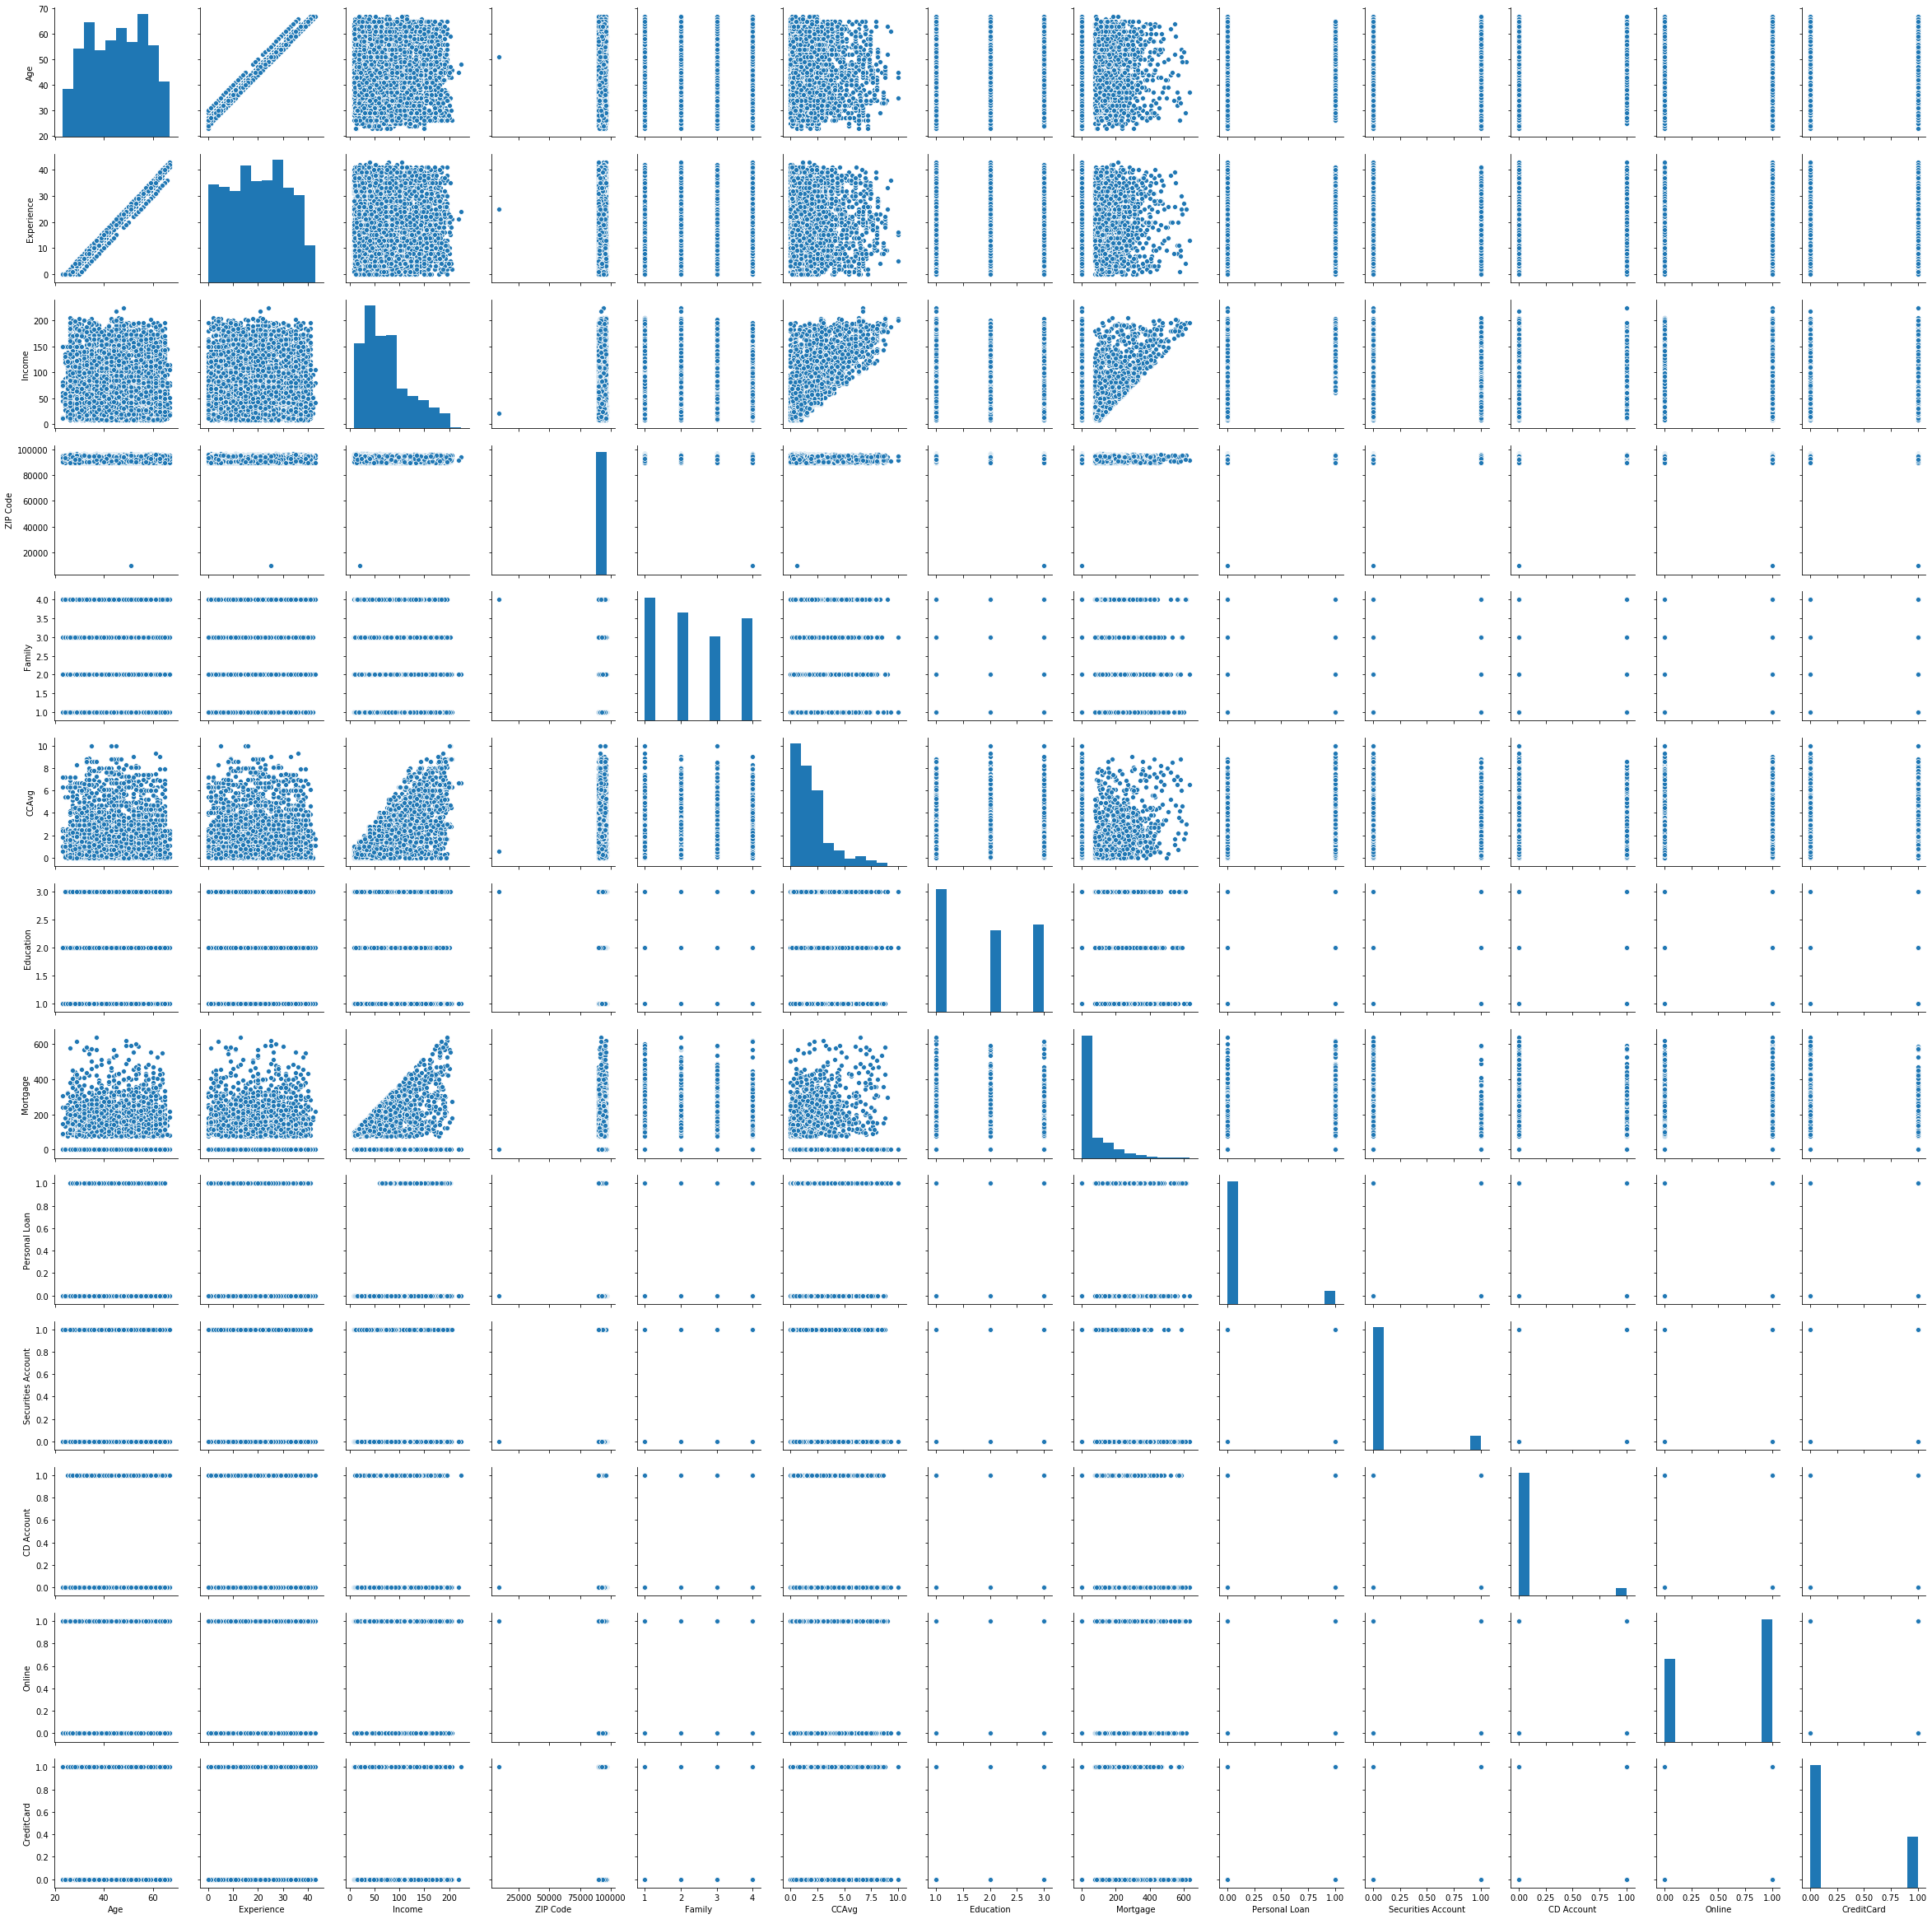

In [13]:
sns.pairplot(bank_df.iloc[:,1:])

In [14]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in 
                       list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False))
corrank(bank_df)

                                  pairs      corr
13                    (Age, Experience)  0.994229
38                      (Income, CCAvg)  0.645984
41              (Income, Personal Loan)  0.502462
65               (CCAvg, Personal Loan)  0.366889
85     (Securities Account, CD Account)  0.317034
82          (Personal Loan, CD Account)  0.316355
89             (CD Account, CreditCard)  0.278644
40                   (Income, Mortgage)  0.206806
88                 (CD Account, Online)  0.175880
43                 (Income, CD Account)  0.169738
76            (Mortgage, Personal Loan)  0.142095
71           (Education, Personal Loan)  0.136722
67                  (CCAvg, CD Account)  0.136534
64                    (CCAvg, Mortgage)  0.109905
78               (Mortgage, CD Account)  0.089311
56                  (Family, Education)  0.064929
58              (Family, Personal Loan)  0.061367
18                     (Age, Education)  0.041334
81  (Personal Loan, Securities Account)  0.021954


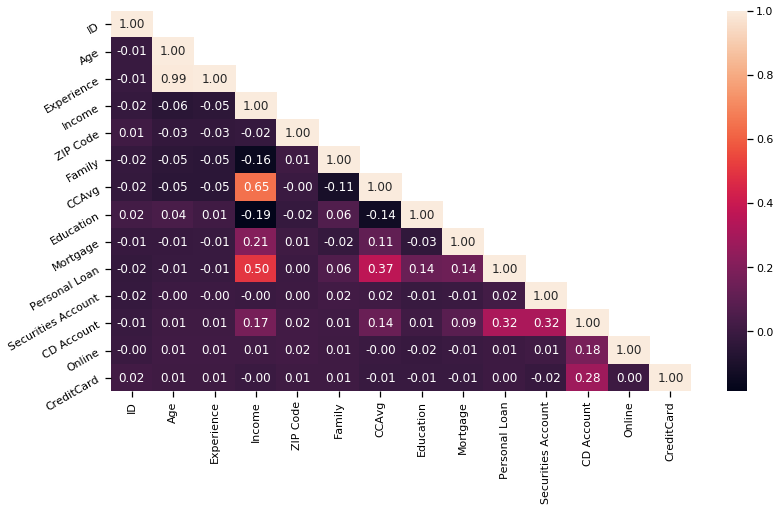

In [15]:
#Graphical representation of correlations between features
corr = bank_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### Observation

1. Age and Experience is highly correlated.
2. Income and CCAvg is moderately correlated.
 

Text(0, 0.5, 'Age')

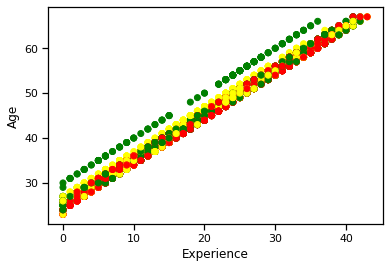

In [16]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(bank_df['Experience'], bank_df['Age'], c=bank_df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

#### Observation 
Above plot shows that experience and age have a positive correlation. Also the colors show the education level. There is a gap in the mid forties of age and also more customers are in the under graduate level of education. 

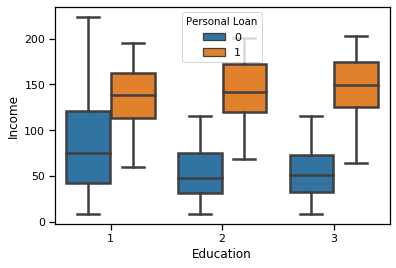

In [17]:
#Influence of income and education on personal loan
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=bank_df)

#### Observation
It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

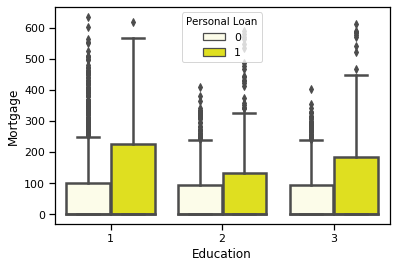

In [18]:
#Influence of education and mortgage on personal loan
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=bank_df, color='yellow')

#### Inference 
From the above chart it seems that customers who do not have personal loan and customers who have personal loan both have high mortgage 

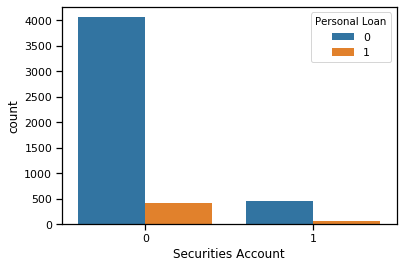

In [19]:
sns.countplot(x='Securities Account', hue='Personal Loan', data=bank_df)

#### Observation
Majority of customers who do not have loan have securities account

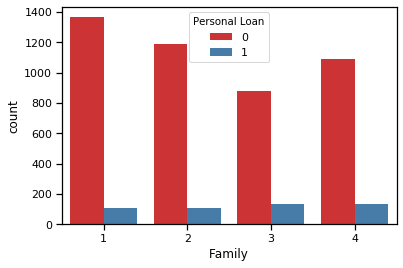

In [20]:
sns.countplot(x='Family', hue='Personal Loan', data=bank_df, palette='Set1')

#### Observation
Family size does not have any impact on personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association. 

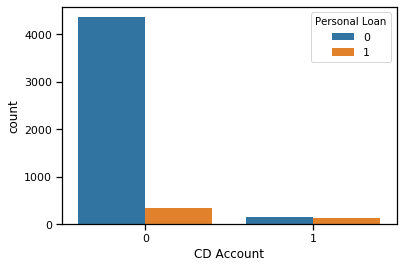

In [21]:
sns.countplot(x='CD Account', hue='Personal Loan', data=bank_df)

#### Observation
Customer who does not have CD account, does not have personal loan. But almost all customers who have CD account have personal loan as well 

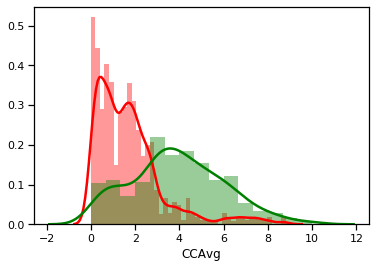

In [22]:
sns.distplot(bank_df[bank_df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(bank_df[bank_df['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [23]:
print("Avg. Credit Card spending of Non-Loan Customers: ", bank_df[bank_df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print("Avg. Credit Card spending of Loan customers: ", bank_df[bank_df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Avg. Credit Card spending of Non-Loan Customers:  1400.0
Avg. Credit Card spending of Loan customers:  3800.0


#### Observation
Above plot shows that customers who have personal loan have a higher average credit card spending. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a personal loan. This could be useful information. 

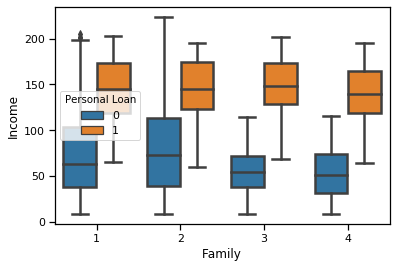

In [24]:
sns.boxplot(x='Family', y='Income', hue='Personal Loan', data=bank_df)

#### Observation
Above plot shows that families with income less than 100k are less likely to take loan than families with high income

## Step6 - Split data into train, test set 

In [25]:
#Making copies of dataframe & removing ID and Target Attribute
X = bank_df.copy()
X.drop(['ID', 'Personal Loan'], axis = 1, inplace=True)
#Select all rows and the 10th column which is the classification of "Taken (1)", "Not Taken (0)" for customers
Y = bank_df.iloc[:,9]

X = np.array(X)
Y = np.array(Y)
#Taking 70:30 training and test set
test_size = 0.30
#Random number seeding for reapeatability of the code
seed = 1  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("Split Train and Test Shape")
print("--------------------------")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Sc = StandardScaler()
scaledX_train = Sc.fit_transform(X_train)
scaledX_test = Sc.transform(X_test)
print("Scaled Split Train and Test Shape")
print("---------------------------------")
print(scaledX_train.shape)
print(scaledX_test.shape)

Split Train and Test Shape
--------------------------
(3500, 12)
(1500, 12)
(3500,)
(1500,)
Scaled Split Train and Test Shape
---------------------------------
(3500, 12)
(1500, 12)


## Step7 - Build Model and Comparision

Using KFold model selection without scaled data to check quick comparision between models.

NB: 0.886000 (0.010469)
LR: 0.908200 (0.007820)
KNN: 0.899200 (0.009086)


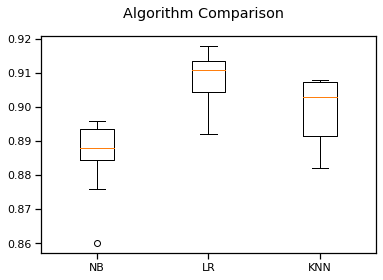

In [32]:
df_result = pd.DataFrame(columns = ['Model', 'Accuracy', 'Scaled Accuracy'])

models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    df_result = df_result.append({'Model': name, 'Accuracy': cv_results.mean()}, ignore_index=True) 
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Conclusion
The aim of the bank is to convert there liability customers into loan customers. Bank needs to set up a new marketing campaign; hence, need information about the connection between the variables given in the data. Three classification algorithms are used in this study. From the above graph, it appears Logistics Regression Classifier has the highest accuracy and we can choose that as our model. However, we will further go down and apply customization for finalize the best/final model.

## Step8 & 9 - Apply & Evaluate Model - Naïve Bayes

### Using mlXtend library for best features selection available in data set 

In [33]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()

#Build step forward feature selection
sfs1 = sfs(gnb_model, k_features=12, forward=True, scoring='r2', cv=10)

print(scaledX_train.shape)
print(scaledX_test.shape)

(3500, 12)
(1500, 12)


In [34]:
#Perform SFFS
sfs1 = sfs1.fit(scaledX_train, Y_train)

In [35]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0',),
  'ci_bound': 0.0006985464436877177,
  'std_dev': 0.000940533544045095,
  'std_err': 0.000313511181348365},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0', '1'),
  'ci_bound': 0.0006985464436877177,
  'std_dev': 0.000940533544045095,
  'std_err': 0.000313511181348365},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0', '1', '3'),
  'ci

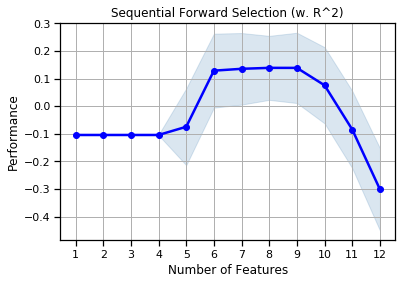

In [36]:
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [37]:
#Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Seems like all features are contributing to prediction 

### Print Accuracy and Confusion Matrix and Conclude your findings 

In [38]:
#Invoking the GaussianNB classifier function.
gnb_model.fit(scaledX_train, Y_train)
print("Training Score: ", gnb_model.score(scaledX_train, Y_train))

#Invoking the GaussianNB classifier function.
Y_predict = gnb_model.predict(scaledX_test)
print("Testing Score: ", gnb_model.score(scaledX_test, Y_test))

df_result.loc[0, 'Scaled Accuracy'] = gnb_model.score(scaledX_train, Y_train)

Training Score:  0.89
Testing Score:  0.8766666666666667


Scaling has reduced the result of Naive Bayes algorithm

In [39]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1231  120]
 [  65   84]]


#### The result is telling us that we have 1,231 out of 1,351 i.e. 89% correct predictions for customers not taking loan. 84 out of 149 i.e. 57% correct predictions for customer taking personal loan which is quite low.

In [40]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



## Step8 & 9 - Apply & Evaluate Model - Logistic Regression 

In [41]:
#Invoking the logistics regression classifier function.
lr_model = LogisticRegression(random_state=seed)

#Build step forward feature selection
sfs1 = sfs(gnb_model, k_features=12, forward=True, scoring='r2', cv=10)

In [42]:
#Perform SFFS
sfs1 = sfs1.fit(scaledX_train, Y_train)

In [43]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0',),
  'ci_bound': 0.0006985464436877177,
  'std_dev': 0.000940533544045095,
  'std_err': 0.000313511181348365},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0', '1'),
  'ci_bound': 0.0006985464436877177,
  'std_dev': 0.000940533544045095,
  'std_err': 0.000313511181348365},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0', '1', '3'),
  'ci

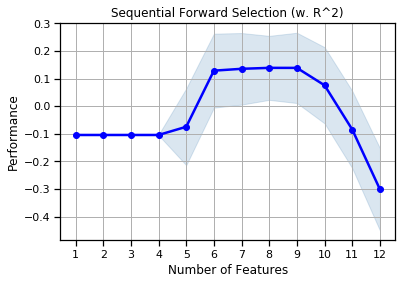

In [44]:
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [45]:
#Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [46]:
#Invoking the logistics regression classifier function.
lr_model.fit(scaledX_train, Y_train)

print("Training Score: ", lr_model.score(scaledX_train , Y_train))
Y_predict = lr_model.predict(scaledX_test)
print("Testing Score: ", lr_model.score(scaledX_test , Y_test))

df_result.loc[1, 'Scaled Accuracy'] = lr_model.score(scaledX_train, Y_train)

Training Score:  0.9531428571428572
Testing Score:  0.948


After applying scaling; Logistic Regression algorithm accuracy has gone up 4-5%.

In [47]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1335   16]
 [  62   87]]


#### The result is telling us that we have 1,335 out of 1,351 i.e. 98% correct predictions for customers not taking loan. 87 out of 149 i.e. 58% correct predictions for customer taking personal loan.

In [48]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



## Step8 & 9 - Apply & Evaluate Model - k-NN Model 

In [49]:
#Creating common function for kNN 
def knn_function(neighbors1, train_accuracy_plot1, test_accuracy_plot1):
    for i, k in enumerate(neighbors1):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(scaledX_train, Y_train)
        #Compute accuracy on the training set
        train_accuracy_plot1[i] = knn_model.score(scaledX_train, Y_train)
        #Compute accuracy on the testing set
        test_accuracy_plot1[i] = knn_model.score(scaledX_test, Y_test)
        #Print Result
        print("For K=%d, Test Accuracy=%f, & Train Accuracy=%f"%(k, test_accuracy_plot1[i], train_accuracy_plot1[i]))
#Initiating the Model with K = 1, 3, 5 ... 19
neighbors = np.arange(1, 22, 2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
knn_function(neighbors, train_accuracy_plot, test_accuracy_plot)

For K=1, Test Accuracy=0.944667, & Train Accuracy=1.000000
For K=3, Test Accuracy=0.948667, & Train Accuracy=0.974000
For K=5, Test Accuracy=0.949333, & Train Accuracy=0.970286
For K=7, Test Accuracy=0.948000, & Train Accuracy=0.964000
For K=9, Test Accuracy=0.946000, & Train Accuracy=0.961714
For K=11, Test Accuracy=0.942667, & Train Accuracy=0.957429
For K=13, Test Accuracy=0.943333, & Train Accuracy=0.955143
For K=15, Test Accuracy=0.943333, & Train Accuracy=0.954571
For K=17, Test Accuracy=0.940000, & Train Accuracy=0.952571
For K=19, Test Accuracy=0.938667, & Train Accuracy=0.953143
For K=21, Test Accuracy=0.937333, & Train Accuracy=0.950571


k=5 is producing better acuracy.

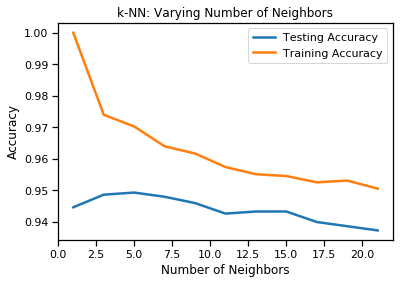

In [50]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [51]:
#Checking for k=5
k=5

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(scaledX_train, Y_train)
#Print Result
print("Training Score: ", knn_model.score(scaledX_train , Y_train))
print("Testing Score: ", knn_model.score(scaledX_test , Y_test))
Y_predict = knn_model.predict(scaledX_test)

df_result.loc[2, 'Scaled Accuracy'] = knn_model.score(scaledX_train, Y_train)

Training Score:  0.9702857142857143
Testing Score:  0.9493333333333334


In [52]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1345    6]
 [  70   79]]


In [53]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.93      0.53      0.68       149

    accuracy                           0.95      1500
   macro avg       0.94      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



## Step10 - Provide Insights

## Comparision

In [54]:
df_result.head(3)

,Model,Accuracy,Scaled Accuracy
0,NB,0.8860,0.890000
1,LR,0.9082,0.953143
2,KNN,0.8992,0.970286


# Conclusion

From the above, we can clearly see that k-Nearest neighbors algorithm with scaled data gives us the best accuracy of 97%, as well as the least Type 1 (False Positive) and Type 2 (False Negative) errors.

Hence, In the current set of algorithms applied on the available data, it seems to be the best choice to predict the customers who will accept the personal loan.